In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from autoviml.Auto_ViML import Auto_ViML
from dotenv import dotenv_values

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [3]:
config = dotenv_values('../../.env')
train = pd.read_parquet(config["ENGINEERED_DATA"] + "train_fe.parquet")
test = pd.read_parquet(config["ENGINEERED_DATA"] + "test_fe.parquet")

train.drop("customer_ID", axis=1, inplace=True)
test.drop("customer_ID", axis=1, inplace=True)

In [4]:
train.head()

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,B_1_mean,B_1_std,B_1_min,B_1_max,B_1_last,B_2_mean,B_2_std,B_2_min,B_2_max,B_2_last,R_1_mean,R_1_std,R_1_min,R_1_max,R_1_last,S_3_mean,S_3_std,S_3_min,S_3_max,S_3_last,D_41_mean,D_41_std,D_41_min,D_41_max,D_41_last,B_3_mean,B_3_std,B_3_min,B_3_max,B_3_last,D_42_mean,D_42_std,D_42_min,D_42_max,D_42_last,D_43_mean,D_43_std,D_43_min,D_43_max,D_43_last,...,D_142_last,D_143_mean,D_143_std,D_143_min,D_143_max,D_143_last,D_144_mean,D_144_std,D_144_min,D_144_max,D_144_last,D_145_mean,D_145_std,D_145_min,D_145_max,D_145_last,B_30_count,B_30_last,B_30_nunique,B_38_count,B_38_last,B_38_nunique,D_114_count,D_114_last,D_114_nunique,D_116_count,D_116_last,D_116_nunique,D_117_count,D_117_last,D_117_nunique,D_120_count,D_120_last,D_120_nunique,D_126_count,D_126_last,D_126_nunique,D_63_count,D_63_last,D_63_nunique,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
0,0.93,0.02,0.87,0.96,0.93,0.23,0.83,0,3,0,0.01,0.01,0.00,0.02,0.01,1.01,0.00,1.00,1.01,1.01,0.00,0.00,0.00,0.01,0.01,0.11,0.01,0.10,0.14,0.14,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,0,0,0,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0,0,0,13,0,1,13,2,1,13,1,1,13,0,1,13,5,1,13,0,1,13,2,1,13,0,1,13,0,1,13,-1,1,13,6,1,0
1,0.90,0.02,0.86,0.93,0.88,7.15,6.74,0,19,6,0.03,0.03,0.01,0.11,0.03,0.99,0.05,0.82,1.01,1.00,0.01,0.00,0.00,0.01,0.01,0.12,0.02,0.09,0.17,0.17,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,0.14,0.17,0.06,0.53,0.06,...,NaN,0.00,0.00,0,0,0,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0,0,0,13,0,1,13,2,1,13,1,1,13,0,1,13,0,1,13,0,2,13,2,1,13,3,1,13,0,1,13,-1,1,13,6,1,0
2,0.88,0.03,0.80,0.90,0.88,0.00,0.00,0,0,0,0.00,0.00,0.00,0.01,0.00,0.82,0.00,0.81,0.82,0.81,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,0,0,0,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0,0,0,13,0,1,13,1,1,13,1,2,13,0,1,13,0,1,13,0,1,13,2,1,13,3,1,13,2,1,13,-1,1,13,6,1,0
3,0.60,0.02,0.57,0.62,0.62,1.54,3.02,0,9,0,0.06,0.08,0.01,0.28,0.01,0.96,0.08,0.81,1.01,1.01,0.01,0.00,0.00,0.01,0.01,0.25,0.10,0.15,0.41,0.29,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,0.06,0.04,0.01,0.15,0.05,...,NaN,0.00,0.00,0,0,0,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0,0,0,13,0,1,13,2,1,13,1,1,13,0,1,13,7,2,13,0,1,13,2,1,13,3,1,13,0,1,13,-1,1,13,3,3,0
4,0.89,0.04,0.81,0.94,0.87,0.00,0.00,0,0,0,0.01,0.00,0.00,0.01,0.01,0.81,0.00,0.81,0.82,0.82,0.00,0.00,0.00,0.01,0.00,0.17,0.00,0.17,0.18,0.18,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,0.05,0.01,0.04,0.06,0.04,...,NaN,0.00,0.00,0,0,0,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0,0,0,13,0,1,13,1,2,13,1,1,13,0,1,13,5,1,13,0,1,13,2,1,13,3,1,13,0,1,13,1,1,13,6,1,0


In [5]:
test.head()

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,B_1_mean,B_1_std,B_1_min,B_1_max,B_1_last,B_2_mean,B_2_std,B_2_min,B_2_max,B_2_last,R_1_mean,R_1_std,R_1_min,R_1_max,R_1_last,S_3_mean,S_3_std,S_3_min,S_3_max,S_3_last,D_41_mean,D_41_std,D_41_min,D_41_max,D_41_last,B_3_mean,B_3_std,B_3_min,B_3_max,B_3_last,D_42_mean,D_42_std,D_42_min,D_42_max,D_42_last,D_43_mean,D_43_std,D_43_min,D_43_max,D_43_last,...,D_142_max,D_142_last,D_143_mean,D_143_std,D_143_min,D_143_max,D_143_last,D_144_mean,D_144_std,D_144_min,D_144_max,D_144_last,D_145_mean,D_145_std,D_145_min,D_145_max,D_145_last,B_30_count,B_30_last,B_30_nunique,B_38_count,B_38_last,B_38_nunique,D_114_count,D_114_last,D_114_nunique,D_116_count,D_116_last,D_116_nunique,D_117_count,D_117_last,D_117_nunique,D_120_count,D_120_last,D_120_nunique,D_126_count,D_126_last,D_126_nunique,D_63_count,D_63_last,D_63_nunique,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique
0,0.60,0.02,0.57,0.63,0.57,2.22,3.53,0,8,4,0.01,0.00,0.01,0.02,0.01,0.90,0.10,0.81,1.01,1.01,0.00,0.00,0.00,0.00,0.00,0.19,0.04,0.15,0.27,0.15,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.00,0.12,0.01,0.10,0.13,0.10,0.01,0.00,0.01,0.01,0.01,...,NaN,NaN,-0.11,0.33,-1,0,0,0.01,0.00,0.00,0.01,0.00,-0.11,0.33,-1,0,0,9,0,1,9,2,2,9,0,2,9,0,2,9,0,2,9,1,2,9,1,1,9,0,1,9,3,2,9,-1,1,9,6,2
1,0.86,0.03,0.79,0.91,0.84,5.08,6.03,0,17,4,0.05,0.07,0.01,0.28,0.02,1.00,0.00,1.00,1.01,1.01,0.00,0.00,0.00,0.00,0.00,0.12,0.04,0.06,0.17,0.11,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,0.00,0,0,0,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0,0,0,13,0,1,13,2,2,13,1,1,13,0,1,13,4,1,13,0,1,13,2,1,13,3,1,13,0,1,13,-1,1,13,6,1
2,0.75,0.06,0.67,0.84,0.70,6.00,9.00,0,23,0,0.01,0.01,0.00,0.04,0.00,0.90,0.10,0.81,1.01,0.81,0.00,0.00,0.00,0.00,0.00,0.16,0.02,0.13,0.18,0.17,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.02,NaN,NaN,NaN,NaN,NaN,0.13,0.04,0.09,0.21,0.11,...,0.15,0.15,1.00,0.00,1,1,1,0.39,0.04,0.32,0.46,0.46,1.00,0.00,1,1,1,13,0,1,13,2,1,13,0,1,13,0,1,13,4,2,13,0,1,13,1,2,13,0,1,13,3,2,13,1,1,13,4,2
3,0.47,0.03,0.43,0.51,0.51,15.85,4.36,7,23,11,0.28,0.04,0.15,0.31,0.15,0.09,0.05,0.03,0.21,0.21,0.00,0.00,0.00,0.00,0.00,0.29,0.06,0.18,0.38,0.18,0.06,0.04,0.00,0.17,0.00,0.67,0.15,0.39,0.96,0.50,NaN,NaN,NaN,NaN,NaN,0.30,0.07,0.21,0.41,0.21,...,0.26,0.26,1.00,0.00,1,1,1,0.44,0.08,0.33,0.51,0.50,2.00,0.00,2,2,2,13,0,2,13,3,1,13,0,1,13,0,1,13,5,3,13,0,2,13,2,1,13,4,1,13,2,1,13,-1,1,13,5,1
4,0.32,0.05,0.25,0.43,0.25,11.85,6.68,1,26,26,0.46,0.07,0.36,0.56,0.56,0.04,0.02,0.02,0.11,0.04,0.16,0.24,0.00,0.51,0.50,0.17,0.01,0.16,0.17,0.17,0.00,0.00,0.00,0.00,0.00,0.62,0.18,0.35,0.89,0.83,NaN,NaN,NaN,NaN,NaN,0.23,0.09,0.07,0.37,0.07,...,NaN,NaN,0.00,0.00,0,0,0,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0,0,0,13,1,2,13,6,3,13,0,1,13,0,1,13,0,1,13,1,2,13,1,1,13,3,1,13,2,2,13,-1,1,13,5,2


In [6]:
target = 'target'
sample_submission = ''
scoring_parameter = 'logloss'
VERSION = 1

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (458913, 919)
    Training Set Memory Usage = 1776.00 MB
Test Set Shape = (924621, 918)
    Test Set Memory Usage = 3573.88 MB
Single_Label Target: ['target']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:  340085  ->   74.1%
           1:  118828  ->   25.9%
    Target target is already numeric. No transformation done.
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
########################################################################

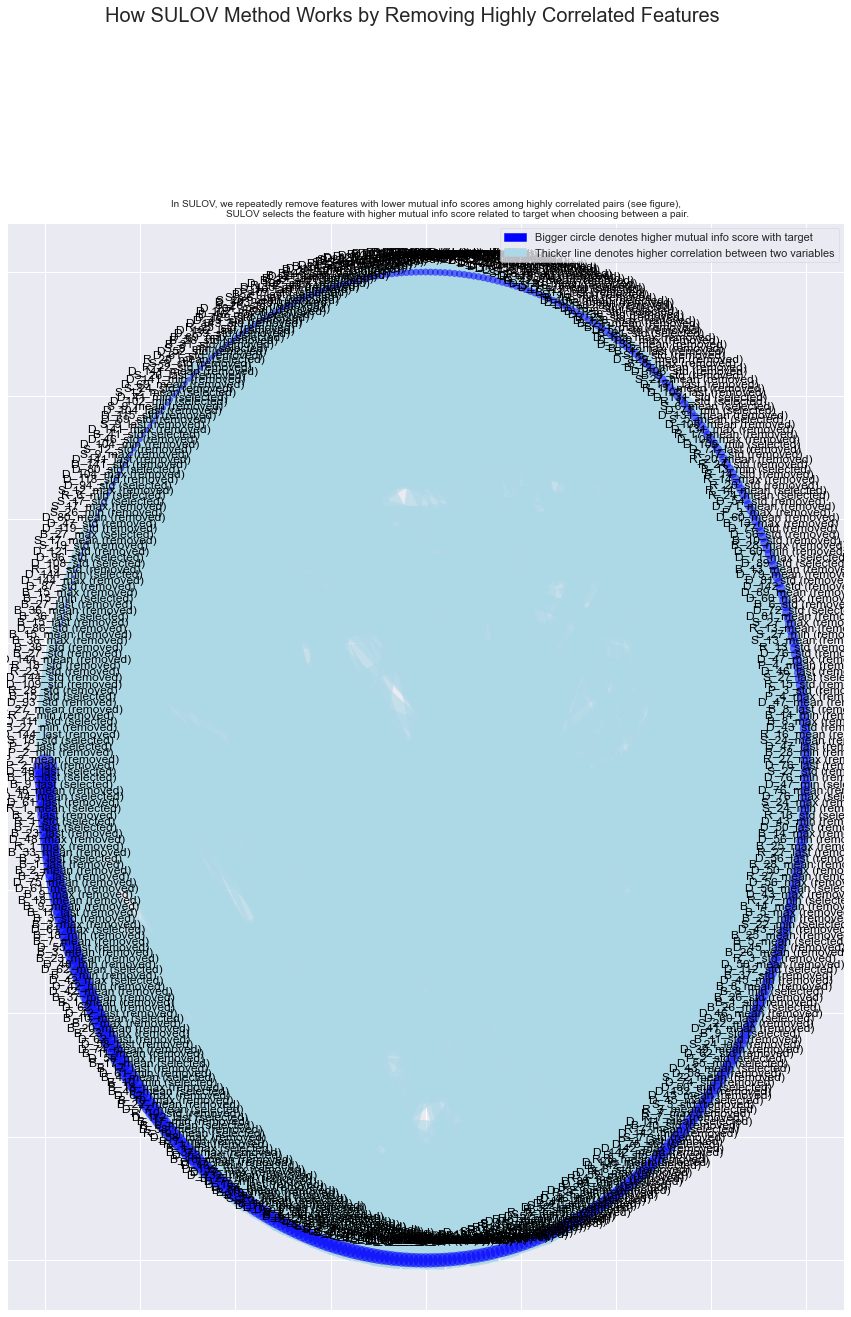

Splitting selected features into float and categorical (integer) variables:
    (235) float variables ...
    (658) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 893 
    Finding Important Features using Boosted Trees algorithm...
        using 893 variables...
        using 714 variables...
        using 535 variables...
        using 356 variables...
        using 177 variables...
Found 60 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  367130 , CV rows =  91783
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing M

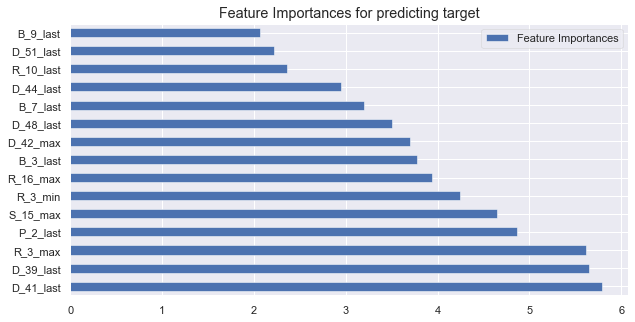

In [7]:
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    sample_submission,
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter=scoring_parameter,
    KMeans_Featurizer=False,
    Boosting_Flag=None,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

In [8]:
model_path = config["VIML_MODELS"] + f'viml_V{VERSION}.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

In [9]:
trainm.to_parquet(config["ENGINEERED_DATA"] + f"viml_train_V{VERSION}.parquet", index=False)
testm.to_parquet(config["ENGINEERED_DATA"] + f"viml_test_V{VERSION}.parquet", index=False)

In [10]:
trainm.head()

,P_2_last,B_33_last,R_2_last,B_22_last,B_18_last,B_9_last,D_44_last,D_44_max,B_3_last,D_48_last,D_42_max,B_7_last,R_5_last,R_1_mean,D_56_std_Missing_Flag,D_41_last,D_39_last,R_4_last,D_51_min,D_51_last,B_30_last,B_20_last,R_2_max,D_66_last,B_20_max,D_42_max_Missing_Flag,R_10_max,D_42_mean_Missing_Flag,D_42_min_Missing_Flag,D_91_min,D_75_last,D_129_max,B_22_max,R_15_max,B_38_last,D_55_last_Missing_Flag,R_21_max,S_15_max,R_5_max,R_8_max,D_84_max,D_84_last,D_115_mean_Missing_Flag,B_19_last,R_3_min,D_120_last,D_129_last,D_123_min,R_3_max,D_78_last,D_115_min_Missing_Flag,D_72_last,D_83_min,B_33_min,D_78_max,R_8_last,R_10_last,D_137_max,D_129_min,R_16_max,target
0,0.93,1,0,0,1.00,0.01,0,0,0.01,0.19,-1.00,0.06,0,0.00,0,0.00,0,0,2,2,0,0,0,-1,0,1,0,1,1,2,0,1,0,0,2,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-1,1,0,0
1,0.88,1,0,0,1.00,0.01,0,0,0.01,0.01,-1.00,0.03,0,0.01,0,0.00,6,0,1,1,0,0,0,-1,0,1,0,1,1,0,0,0,0,0,2,0,0,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,-1,0,1,0
2,0.88,1,0,0,1.00,0.01,0,1,0.01,0.08,-1.00,0.03,0,0.01,0,0.00,0,0,0,1,0,0,0,-1,0,1,0,1,1,0,0,0,0,0,1,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,0,0
3,0.62,1,0,0,1.00,0.02,0,0,0.01,0.01,-1.00,0.01,0,0.01,0,0.00,0,0,0,1,0,0,0,-1,0,1,0,1,1,0,0,1,0,0,2,0,0,8,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,-1,1,1,0
4,0.87,1,0,0,0.53,0.00,0,0,0.01,0.33,-1.00,0.16,0,0.00,0,0.00,0,0,0,0,0,0,0,1,0,1,0,1,1,0,2,1,0,0,1,0,0,8,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,-1,1,0,0


In [11]:
testm.head()

,P_2_last,B_33_last,R_2_last,B_22_last,B_18_last,B_9_last,D_44_last,D_44_max,B_3_last,D_48_last,D_42_max,B_7_last,R_5_last,R_1_mean,D_56_std_Missing_Flag,D_41_last,D_39_last,R_4_last,D_51_min,D_51_last,B_30_last,B_20_last,R_2_max,D_66_last,B_20_max,D_42_max_Missing_Flag,R_10_max,D_42_mean_Missing_Flag,D_42_min_Missing_Flag,D_91_min,D_75_last,D_129_max,B_22_max,R_15_max,B_38_last,D_55_last_Missing_Flag,R_21_max,S_15_max,R_5_max,R_8_max,D_84_max,D_84_last,D_115_mean_Missing_Flag,B_19_last,R_3_min,D_120_last,D_129_last,D_123_min,R_3_max,D_78_last,D_115_min_Missing_Flag,D_72_last,D_83_min,B_33_min,D_78_max,R_8_last,R_10_last,D_137_max,D_129_min,R_16_max,target_proba_0,target_proba_1,target_predictions,target_Adaboost_predictions,target_Decision_Tree_predictions,target_Naive_Bayes_predictions,target_Bagging_Classifier_predictions,target_Linear_predictions,target_Ensembled_predictions
0,0.82,1.00,0.00,0.12,0.59,0.00,0.03,0.02,0.39,0.15,0.22,0.72,0.00,-0.00,1.00,0.10,0.02,0.00,0.00,0.14,0.33,0.06,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.05,0.50,0.12,0.00,0.38,0.00,0.00,0.16,0.00,0.00,0.02,0.02,0.00,0.01,0.02,1.00,0.50,0.00,0.01,0.04,0.00,0.10,0.00,1.00,0.03,0.00,0.00,0.00,0.00,0.00,0.88,0.12,0.00,0,0,0,0,0.00,0
1,0.93,1.00,0.00,0.12,1.00,0.00,0.03,0.02,0.39,0.11,0.00,0.68,0.00,-0.00,0.00,0.10,0.02,0.00,0.00,0.00,0.33,0.06,0.00,0.00,0.06,1.00,0.00,1.00,1.00,0.17,0.00,0.50,0.12,0.00,0.38,0.00,0.00,0.07,0.00,0.00,0.02,0.02,0.00,0.01,0.00,0.50,0.50,0.50,0.00,0.04,0.00,0.10,0.06,1.00,0.03,0.00,0.00,0.00,0.50,0.00,0.99,0.01,0.00,0,0,0,0,0.00,0
2,0.87,1.00,0.00,0.12,0.59,0.00,0.03,0.02,0.39,0.15,0.00,0.70,0.00,-0.00,1.00,0.10,0.00,0.00,0.00,0.00,0.33,0.06,0.00,1.00,0.06,1.00,0.00,1.00,1.00,0.17,0.02,0.50,0.12,0.00,0.38,0.00,0.00,0.14,0.00,0.00,0.02,0.02,0.00,0.01,0.00,0.50,0.50,0.50,0.01,0.04,0.00,0.10,0.06,1.00,0.03,0.00,0.00,0.00,0.50,0.00,0.97,0.03,0.00,0,0,0,0,0.00,0
3,0.80,0.50,0.00,0.25,0.15,0.01,0.09,0.11,0.58,0.16,0.00,0.73,0.00,-0.00,1.00,0.10,0.06,0.00,0.00,0.00,0.33,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.17,0.15,0.50,0.38,0.00,0.50,0.00,0.00,0.11,0.00,0.00,0.02,0.02,0.00,0.17,0.02,0.50,0.50,0.50,0.04,0.04,0.00,0.10,0.06,0.50,0.03,0.00,0.00,0.00,0.50,0.03,0.57,0.43,1.00,0,0,0,0,1.00,0
4,0.69,0.50,0.00,0.50,0.21,0.02,0.12,0.09,0.71,0.20,0.00,0.75,0.00,0.08,1.00,0.10,0.15,0.00,0.00,0.00,0.67,1.00,0.00,0.00,1.00,1.00,0.14,1.00,1.00,0.17,0.08,1.00,0.50,0.00,0.88,0.00,0.00,0.16,0.00,0.00,0.02,0.02,0.00,0.75,0.00,1.00,1.00,0.50,0.03,0.12,0.00,0.10,0.06,0.50,0.09,0.00,0.07,0.00,0.50,0.03,0.09,0.91,1.00,0,0,0,0,1.00,0
